In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import tensorflow as tf

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [3]:
print("Shape of training set:\n",train_input.shape, train_target.shape)
print("Shape of test set:\n", test_input.shape, test_target.shape)

Shape of training set:
 (60000, 28, 28) (60000,)
Shape of test set:
 (10000, 28, 28) (10000,)


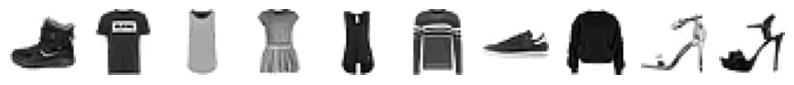

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axes[i].imshow(train_input[i], cmap='gray_r')
    axes[i].axis('off')

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [10]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)

(48000, 28, 28) (48000,)


In [11]:
print(val_scaled.shape, val_target.shape)

(12000, 28, 28) (12000,)


In [12]:
import tensorflow as tf

In [13]:
dense = tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = tf.keras.Sequential(dense)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
train_scaled = train_scaled.reshape(-1, 28*28)
val_scaled = val_scaled.reshape(-1, 28*28)

In [15]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 674us/step - loss: 21.6883 - accuracy: 0.7307
Epoch 2/5
1500/1500 [==============================] - 1s 664us/step - loss: 16.9722 - accuracy: 0.7781
Epoch 3/5
1500/1500 [==============================] - 1s 676us/step - loss: 15.8981 - accuracy: 0.7865
Epoch 4/5
1500/1500 [==============================] - 1s 664us/step - loss: 15.4343 - accuracy: 0.7933
Epoch 5/5
1500/1500 [==============================] - 1s 661us/step - loss: 15.3091 - accuracy: 0.7954


In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 631us/step - loss: 11.8096 - accuracy: 0.8245


[11.809581756591797, 0.8245000243186951]

In [17]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [18]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [20]:
model = keras.Sequential([dense1, dense2])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


층을 추가하는 다른 방법

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')    
], name='패션 MNIST 모델')

In [23]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


add를 통해 모델을 추가하는 방법

In [24]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 2s 911us/step - loss: 0.5757 - accuracy: 0.8047
Epoch 2/10
1500/1500 [==============================] - 1s 890us/step - loss: 0.4135 - accuracy: 0.8517
Epoch 3/10
1500/1500 [==============================] - 1s 911us/step - loss: 0.3788 - accuracy: 0.8628
Epoch 4/10
1500/1500 [==============================] - 1s 900us/step - loss: 0.3538 - accuracy: 0.8713
Epoch 5/10
1500/1500 [==============================] - 1s 893us/step - loss: 0.3374 - accuracy: 0.8777
Epoch 6/10
1500/1500 [==============================] - 1s 894us/step - loss: 0.3228 - accuracy: 0.8827
Epoch 7/10
1500/1500 [==============================] - 1s 913us/step - loss: 0.3118 - accuracy: 0.8860
Epoch 8/10
1500/1500 [==============================] - 1s 903us/step - loss: 0.3014 - accuracy: 0.8904
Epoch 9/10
1500/1500 [==============================] - 1s 893us/step - loss: 0.2904 - accuracy: 0.8941
Epoch 10/10
1500/1500 [==============================] - 1s 901u

In [27]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 726us/step - loss: 0.3340 - accuracy: 0.8772


[0.3340000808238983, 0.8771666884422302]

In [28]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [31]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 896us/step - loss: 0.5359 - accuracy: 0.8109
Epoch 2/5
1500/1500 [==============================] - 1s 890us/step - loss: 0.3897 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 1s 883us/step - loss: 0.3556 - accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 1s 882us/step - loss: 0.3313 - accuracy: 0.8814
Epoch 5/5
1500/1500 [==============================] - 1s 882us/step - loss: 0.3157 - accuracy: 0.8868


In [32]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 708us/step - loss: 0.3651 - accuracy: 0.8726


[0.3651168644428253, 0.8725833296775818]

In [33]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [34]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [35]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [36]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [37]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [38]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 928us/step - loss: 0.5204 - accuracy: 0.8197
Epoch 2/5
1500/1500 [==============================] - 1s 915us/step - loss: 0.3935 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 1s 918us/step - loss: 0.3535 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 1s 934us/step - loss: 0.3270 - accuracy: 0.8816
Epoch 5/5
1500/1500 [==============================] - 1s 946us/step - loss: 0.3061 - accuracy: 0.8869


In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 733us/step - loss: 0.3644 - accuracy: 0.8655


[0.364402174949646, 0.8654999732971191]

In [42]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [43]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [44]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [47]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


Text(0, 0.5, 'loss')

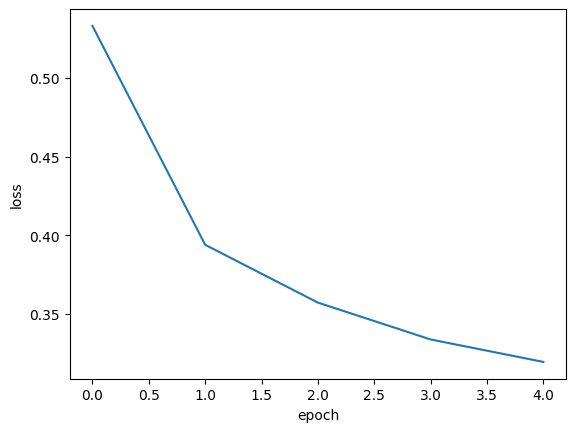

In [48]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

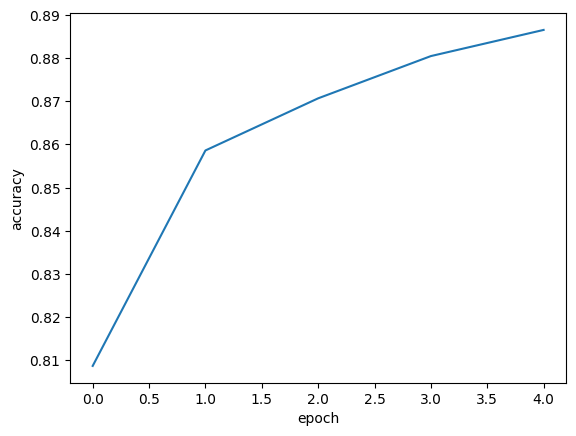

In [49]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [50]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

Text(0, 0.5, 'loss')

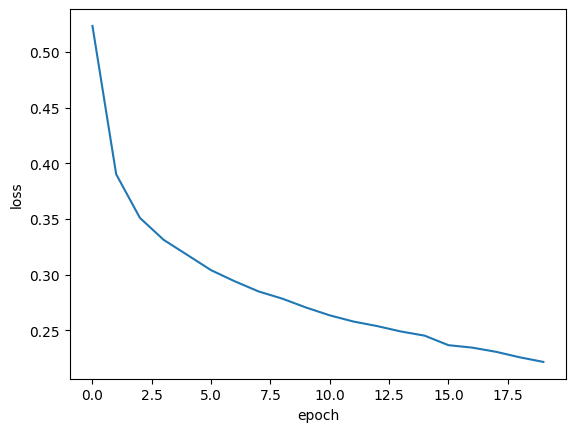

In [53]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [55]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target))

In [56]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'loss')

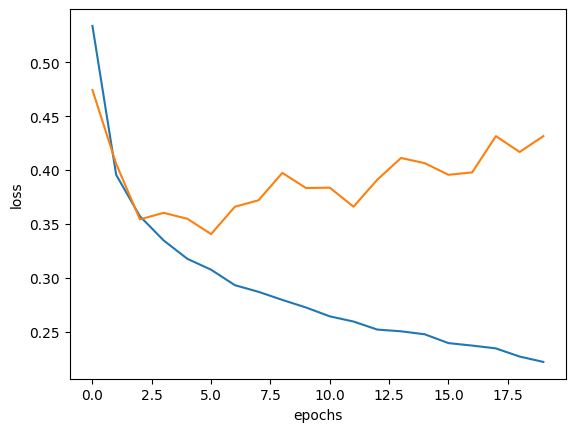

In [58]:
plt.plot(history.history['loss'])
# validation_loss
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

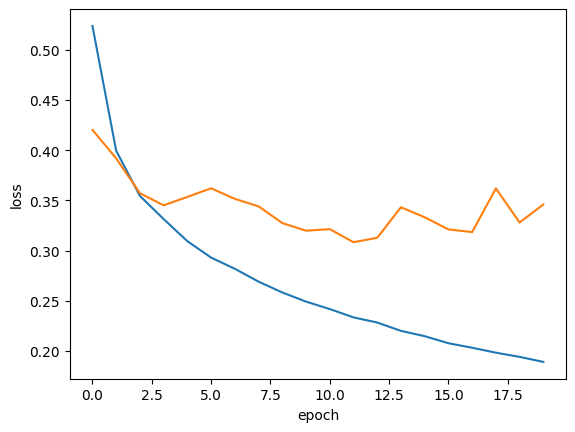

In [59]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')